In [1]:
include("./AbsorptionModels.jl")
using .AbsorptionModels
using Plots
using Latexify
using Catlab.Graphics.Graphviz
using DifferentialEquations

In [4]:
using Catalyst

In [57]:
m1 = @reaction_network begin
    1, P → G + P
    k, G → ∅
    end k

params = [1.0]
tspan   = (0,10)
u0     = [100,500]

ode = ODEProblem(m1,u0,tspan,params)

sol = solve(ode, Tsit5());

In [58]:
latexify(m1)

L"\begin{align}
\require{mhchem}
\ce{ P &->[1] G + P}\\
\ce{ G &->[k] \varnothing}
\end{align}
"

In [59]:
latexify(convert(ODESystem,m1))

L"$\begin{align}
\frac{dP(t)}{dt} =& 0 \\
\frac{dG(t)}{dt} =& 1 \mathrm{P}\left( t \right) - k \mathrm{G}\left( t \right)
\end{align}
$"

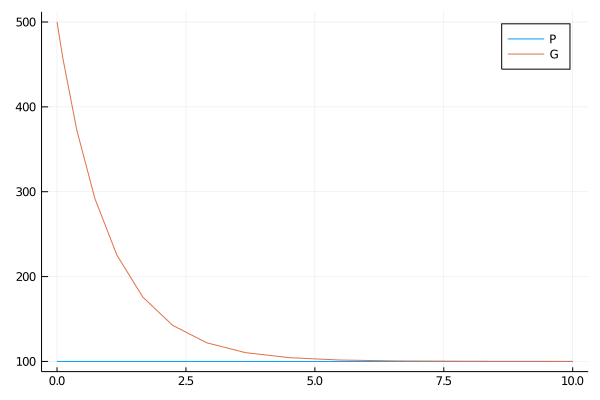

In [60]:
plot(sol.t,sol[1,:],label="P")
plot!(sol.t,sol[2,:],label="G")

In [53]:
m2 = @reaction_network begin
    1, P → G + P
    mm(G,V,K), G → ∅
    end V K

params = [1.0,50.0]
tspan   = (0,10)
u0     = [100,500]

ode2 = ODEProblem(m2,u0,tspan,params)

sol2 = solve(ode2, Tsit5());

In [61]:
latexify(m2)

L"\begin{align}
\require{mhchem}
\ce{ P &->[1] G + P}\\
\ce{ G &->[\frac{V \mathrm{G}\left( t \right)}{K + \mathrm{G}\left( t \right)}] \varnothing}
\end{align}
"

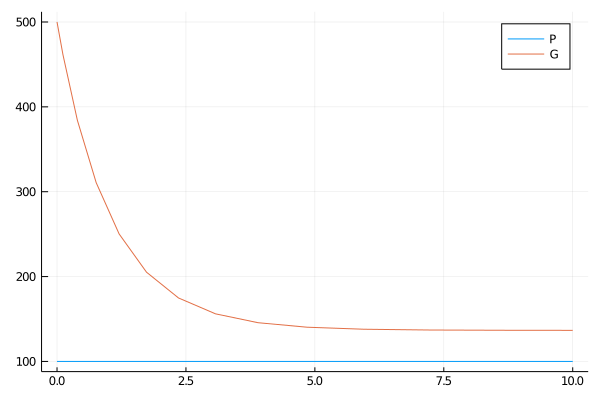

In [54]:
plot(sol2.t,sol2[1,:],label="P")
plot!(sol2.t,sol2[2,:],label="G")